# Capítulo 4: Introdução aos Dados Geográficos

## Dados Vetoriais

https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html


unidades da federacao




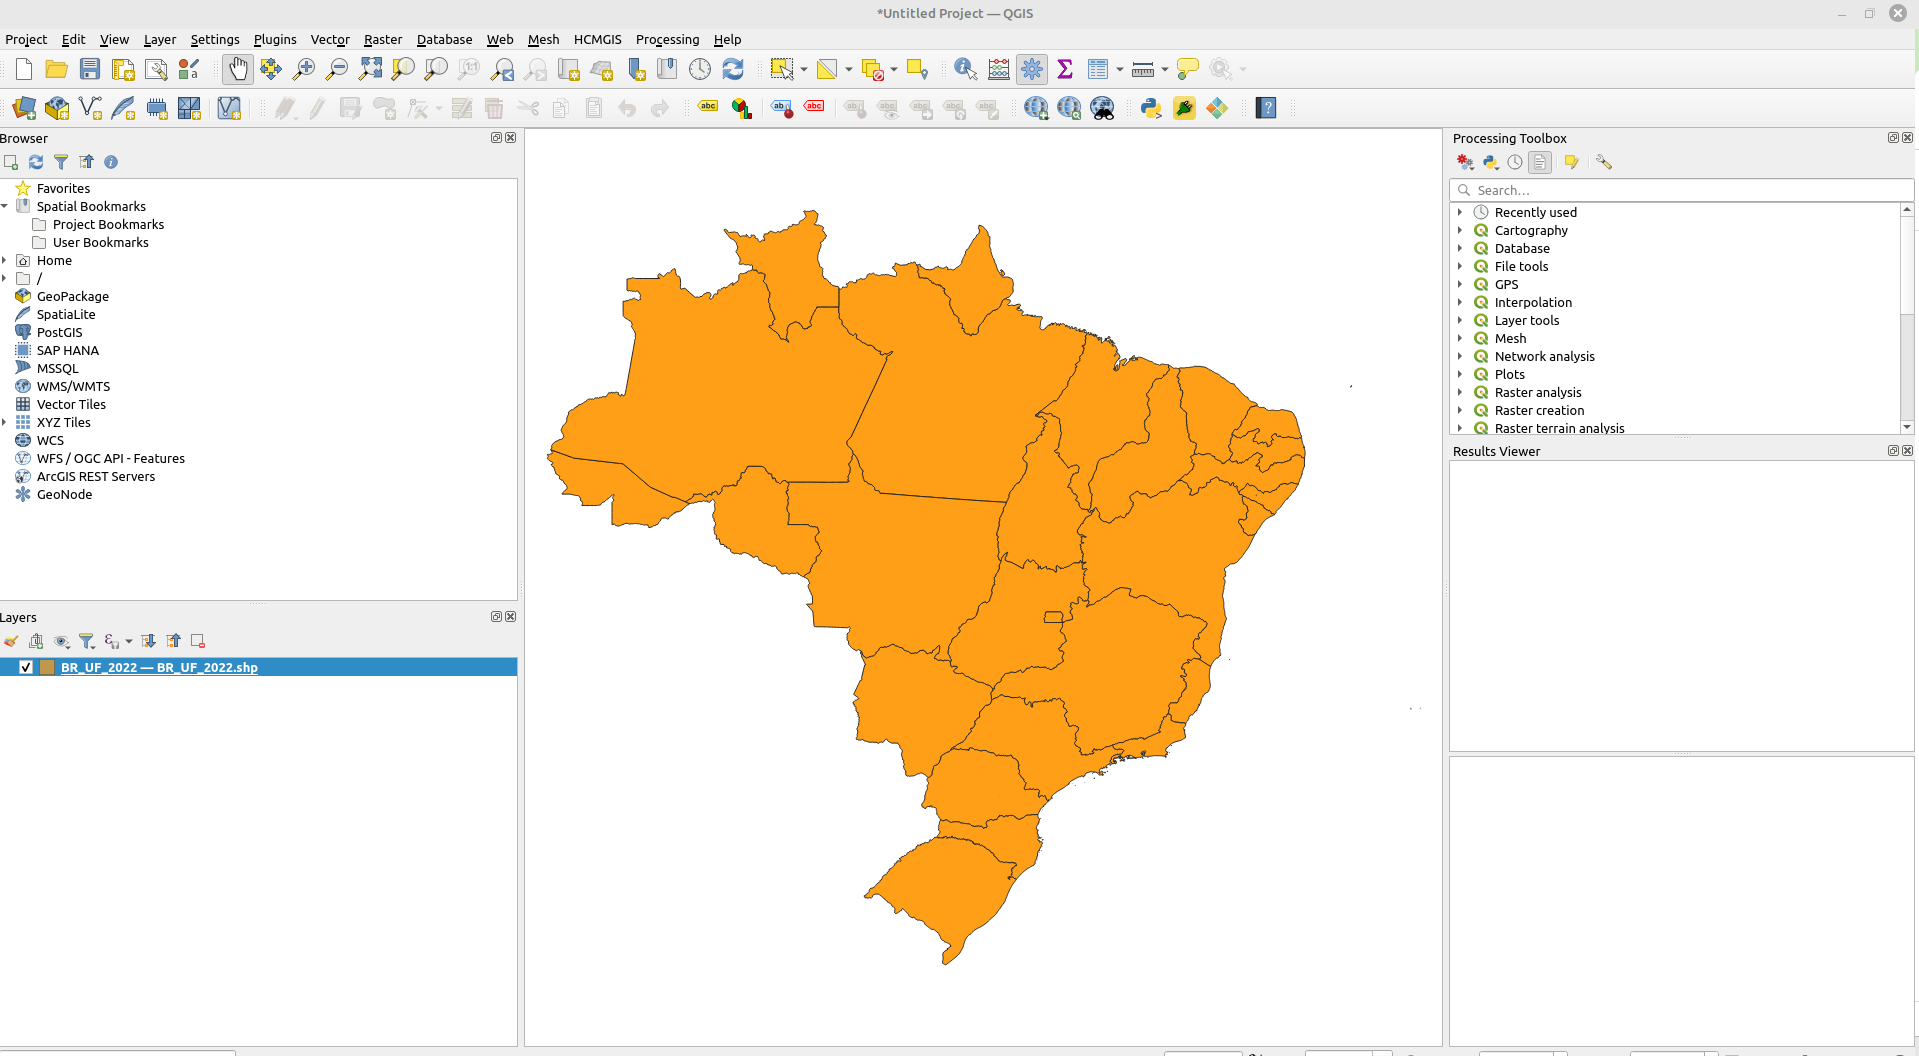

In [2]:
import geopandas as gpd

In [3]:
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip"

In [4]:
ufs = gpd.read_file(url)
ufs.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19..."


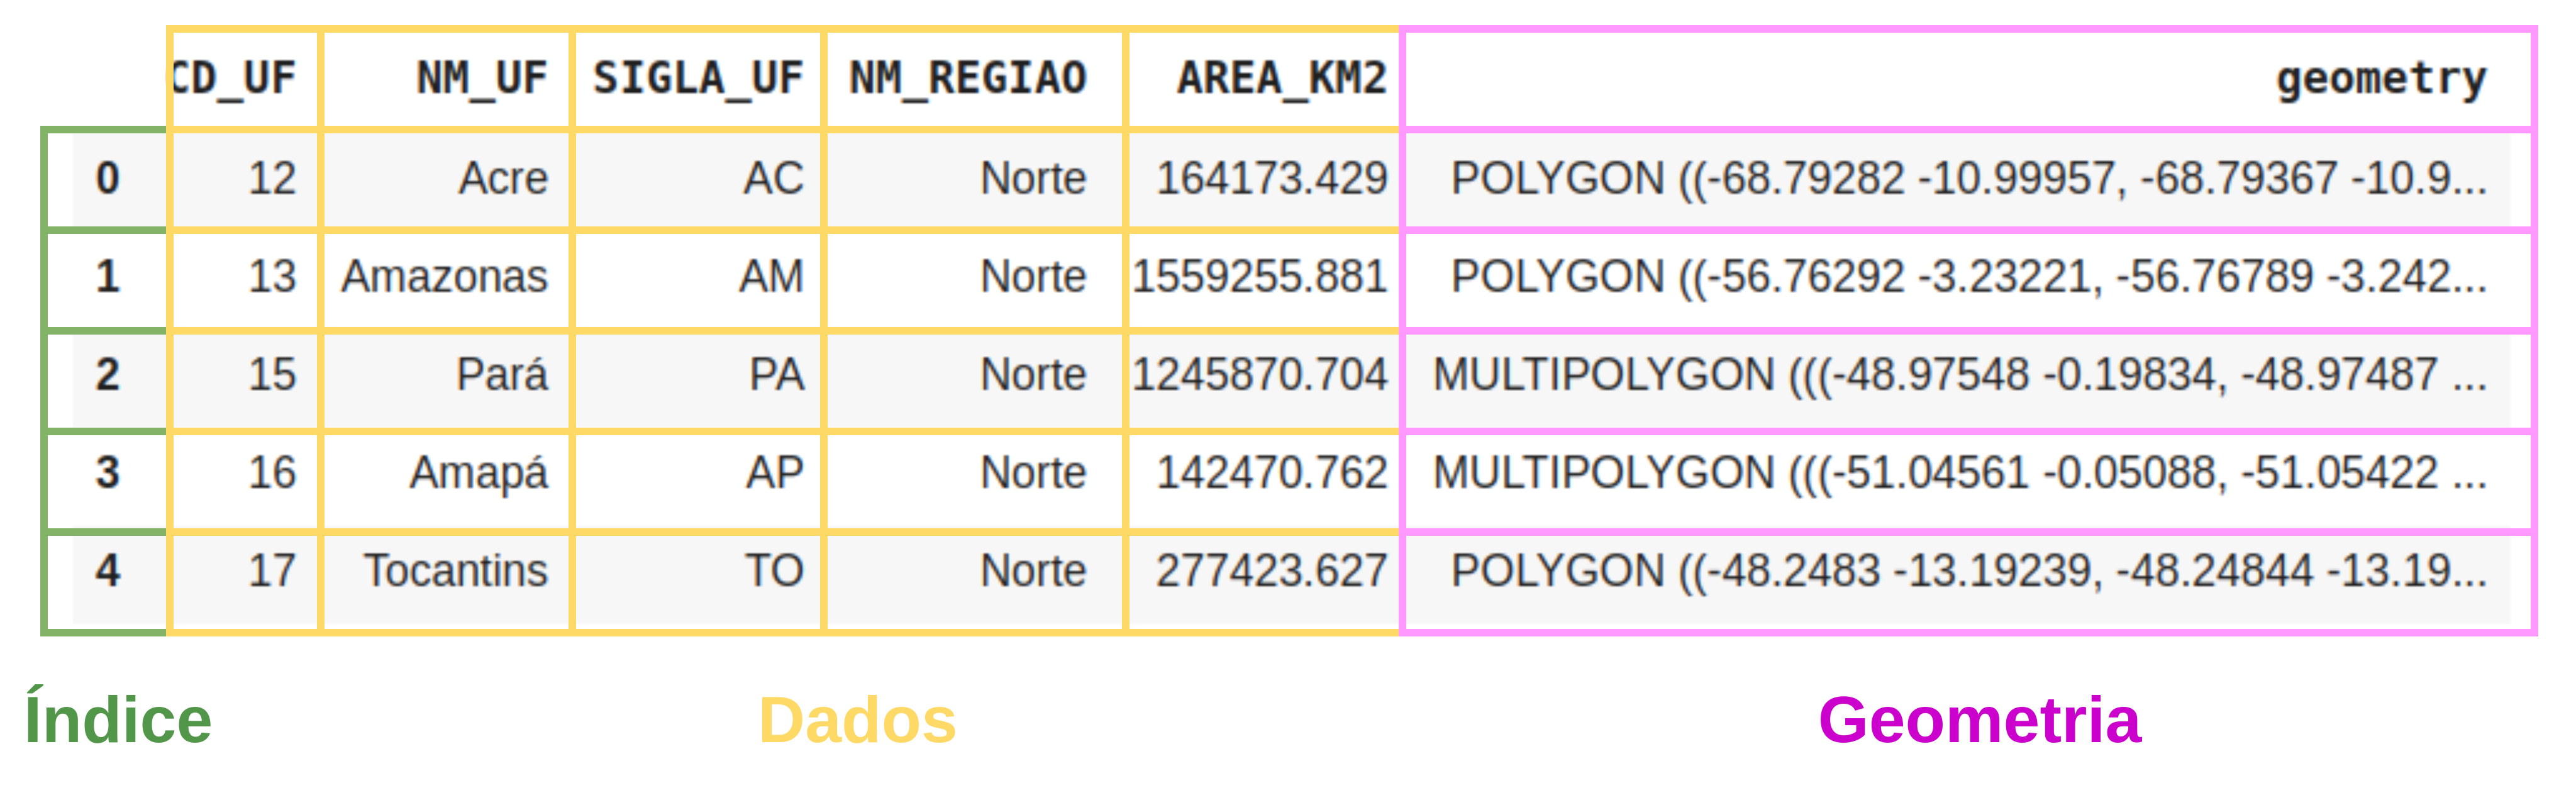

<Axes: >

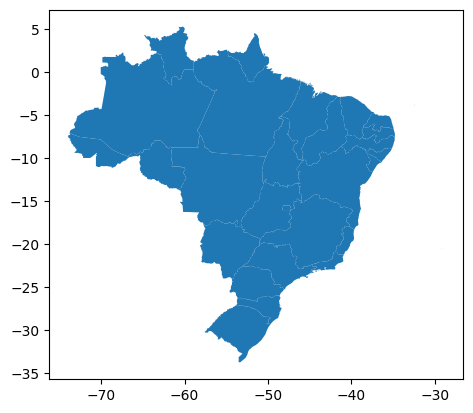

In [5]:
ufs.plot()

<Axes: >

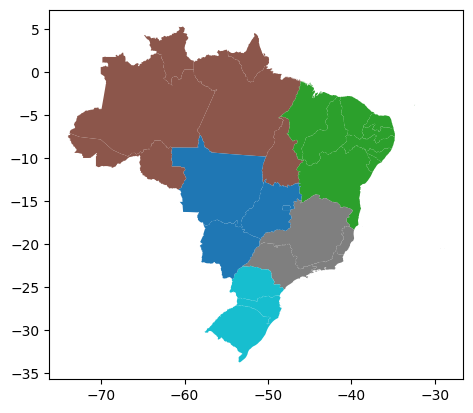

In [6]:
ufs.plot(column="NM_REGIAO")

In [17]:
ufs.NM_REGIAO.unique()

array(['Norte', 'Nordeste\n', 'Sudeste\n', 'Sul\n', 'Centro-oeste\n'],
      dtype=object)

<Axes: >

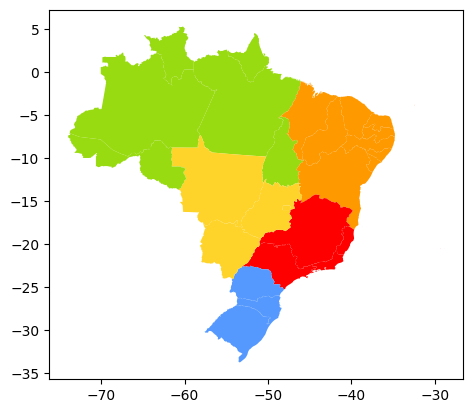

In [22]:
cores = {
    'Norte': '#98DB11', 
    'Nordeste\n': '#FF9900',  
    'Sudeste\n': '#FF0000',   
    'Sul\n': '#5599FF' ,  
    'Centro-oeste\n': '#FFD42A'  , 
}

# Criando a coluna de cores
ufs['cor'] = ufs['NM_REGIAO'].map(cores)

# Plotando usando a coluna 'cor'
ufs.plot(color=ufs['cor'])

In [7]:
import pandas as pd

In [8]:
url= 'https://drive.google.com/uc?id=1hw-SPd8EMBgsqXUKu3FpOhWe4NANgu30'
df = pd.read_excel(url)

In [9]:
df

,Estado,Região,População,PIB
0,Acre,Norte,829780,21374000000
1,Alagoas,Nordeste,3125254,76266000000
2,Amapá,Norte,774268,20100000000
3,Amazonas,Norte,3952262,131531000000
4,Bahia,Nordeste,14659023,352618000000
5,Ceará,Nordeste,8936431,194885000000
6,Distrito Federal,Centro-Oeste,2923369,286944000000
7,Espírito Santo,Sudeste,3975100,186337000000
8,Goiás,Centro-Oeste,6950976,269628000000
9,Maranhão,Nordeste,6800605,124981000000


In [10]:
ufs_merge = pd.merge(ufs, df, left_on="NM_UF", right_on='Estado', how='inner')
ufs_merge.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,Estado,Região,População,PIB
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",Acre,Norte,829780,21374000000
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",Amazonas,Norte,3952262,131531000000
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",Pará,Norte,8442962,262905000000
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",Amapá,Norte,774268,20100000000
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19...",Tocantins,Norte,1584306,51781000000


<Axes: >

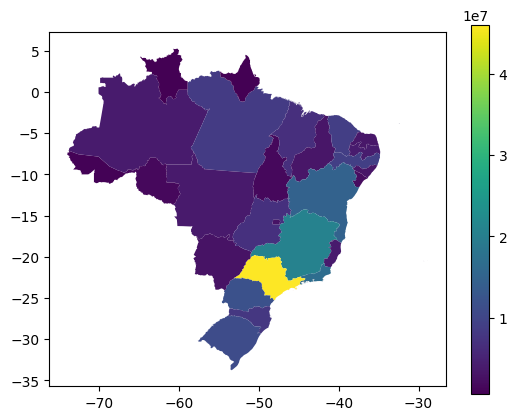

In [23]:
ufs_merge.plot(column="População", cmap="viridis", legend=True)

<Axes: >

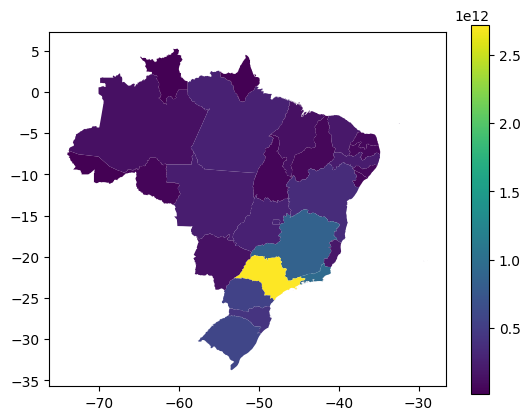

In [24]:
ufs_merge.plot(column="PIB", cmap="viridis", legend=True)

Quando você plota uma coluna contínua no GeoPandas (ou seja, uma coluna com valores numéricos que variam de forma contínua), o esquema de cores é baseado em um colormap do Matplotlib. 

<Axes: >

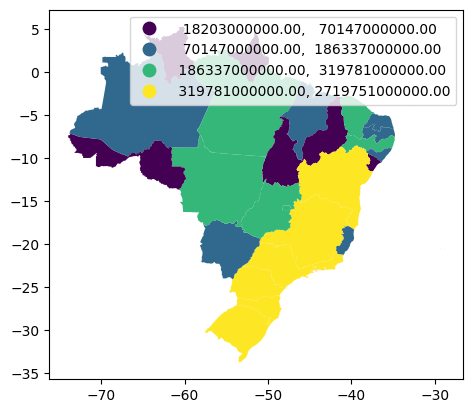

In [25]:
ufs_merge.plot(column="PIB", cmap="viridis", scheme='quantiles', k=4, legend=True)

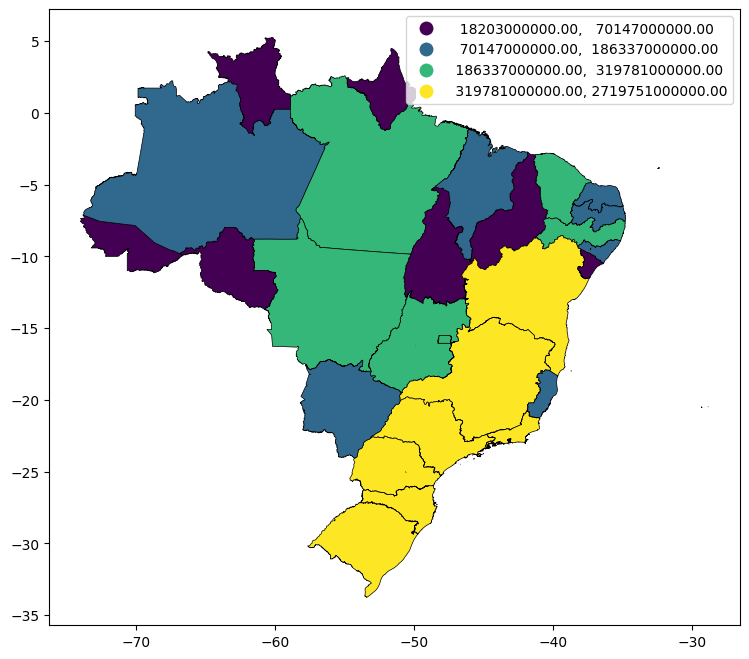

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ufs_merge.plot(column="PIB", cmap="viridis", scheme='quantiles', k=4, legend=True, edgecolor='black',    linewidth=0.5, ax=ax)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 1))  

em um sistema de informacao geografica

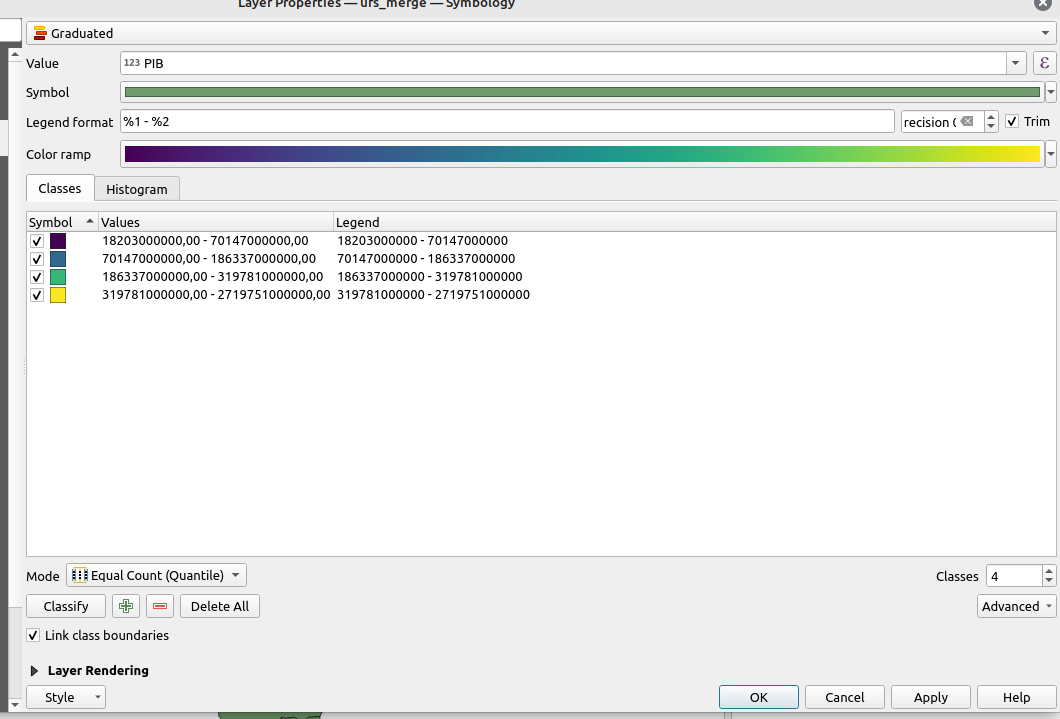

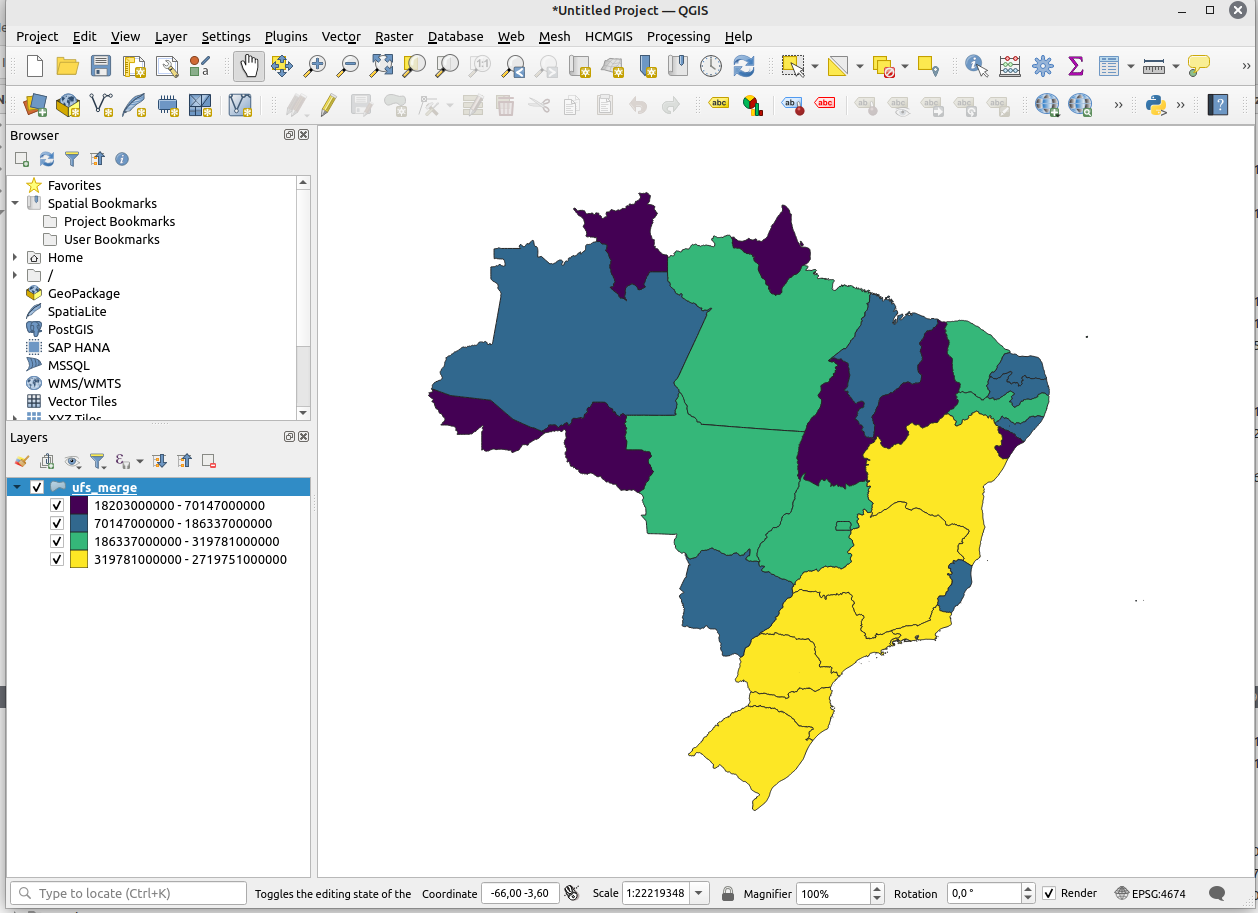

observe que isso é um processo de classificação

In [36]:
ufs_merge.to_file("ufs_merge")

/home/scosta/dev/cdpython/.venv/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'População' to 'Populaçã'
  ogr_write(
